In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm

from scipy.ndimage import gaussian_filter

## Plotting preferences

In [2]:
# Font sizes
big_font = 25
medium_font = 20
small_font = 15


# paper font sizes
paper_title_fs = 35
paper_axis_label_fs = 25
paper_axis_num_size = 20

In [3]:
detection_colours = sns.color_palette("hls", 4)
detection_colours

[(0.86, 0.3712, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86)]

In [4]:
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [5]:
cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

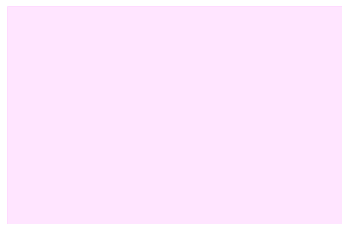

In [6]:
# Empty cells colours 
cmap_empty_cells = plt.get_cmap('cool_r')
empty_cells_alpha = 0.1
empty_cell_colour = cmap_empty_cells(plt.Normalize(-1, 1)(-1))[:-1] + (empty_cells_alpha,)

# Define a small figure to show the color
fig, ax = plt.subplots()
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=empty_cell_colour))
ax.axis('off')
plt.show()

## Data 

In [7]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000.csv')
df

,Inj.0P alpha0,Inj.0P delta0,Inj.0P pmra,Inj.0P pmdec,Inj.0P prlx,Inj.1P alpha0,Inj.1P delta0,Inj.1P pmra,Inj.1P pmdec,Inj.1P prlx,...,npBIC,wpBIC,DeltaBIC,Condition1,Condition2,Condition3,Detection,Astrometric Signature,Noise,S/N
0,170.317926,-47.589593,-61.067230,-21.537380,13.770486,170.317926,-47.589593,-61.067230,-21.537380,13.770486,...,12.868924,42.628246,-29.759322,1,1,0,0,0.425947,87.080604,0.107022
1,316.108662,-26.546008,72.337143,21.951585,12.564744,316.108662,-26.546008,72.337143,21.951585,12.564744,...,12.698723,42.640157,-29.941435,1,1,0,0,26.773355,328.072654,0.156715
2,96.769158,64.326676,10.474477,-144.189945,12.288271,96.769158,64.326676,10.474477,-144.189945,12.288271,...,6.701810,42.704796,-36.002987,1,1,1,1,32.369198,63.543626,0.696922
3,128.709209,-4.405156,29.864524,-56.398005,12.533066,128.709209,-4.405156,29.864524,-56.398005,12.533066,...,3.638645,42.708074,-39.069430,1,1,1,1,97.173015,49.180316,2.697901
4,181.114533,-56.768372,-290.811903,-0.874679,18.624211,181.114533,-56.768372,-290.811903,-0.874679,18.624211,...,10.548324,42.649317,-32.100993,1,1,0,0,24.132075,74.136686,0.526317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50.868338,-39.738868,25.369522,-143.591668,15.626126,50.868338,-39.738868,25.369522,-143.591668,15.626126,...,12.372096,42.608003,-30.235907,1,1,0,0,12.239168,148.624321,0.892765
9996,145.449629,52.715633,-46.472374,-30.338112,14.507241,145.449629,52.715633,-46.472374,-30.338112,14.507241,...,12.237440,42.589525,-30.352086,1,1,0,0,9.528533,48.366104,0.424420
9997,207.485913,32.407407,-71.575142,-27.874995,12.665390,207.485913,32.407407,-71.575142,-27.874995,12.665390,...,10.791719,42.663764,-31.872046,1,1,0,0,54.280800,113.824451,0.349065
9998,138.811962,32.875648,-51.220680,-40.990221,16.283518,138.811962,32.875648,-51.220680,-40.990221,16.283518,...,12.474505,42.634636,-30.160131,1,1,1,1,31.113541,276.625520,2.467424


In [8]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition1', 'Condition2', 'Condition3',
       'Detection', 'Astrometric Signature', 'Noise', 'S/N'],
      dtype='object')

## Planetary Mass and Orbital Period 

##### Bins
- Mass bins are in units of $M_J$
- Period bins are in units of years
- The bins are evenly spaced in logspace

In [9]:
# Setting the mass and period bins 
Mbins = np.logspace(np.log10(0.3), np.log10(13), 20) 
Pbins = np.logspace(-2, 1, 20) 

# Number of bins 
num_Pbins = len(Pbins) - 1
num_Mbins = len(Mbins) - 1

# Midpoints of the bins 
Mbin_midpoints = (Mbins[:-1] + Mbins[1:]) / 2
Pbin_midpoints = (Pbins[:-1] + Pbins[1:]) / 2

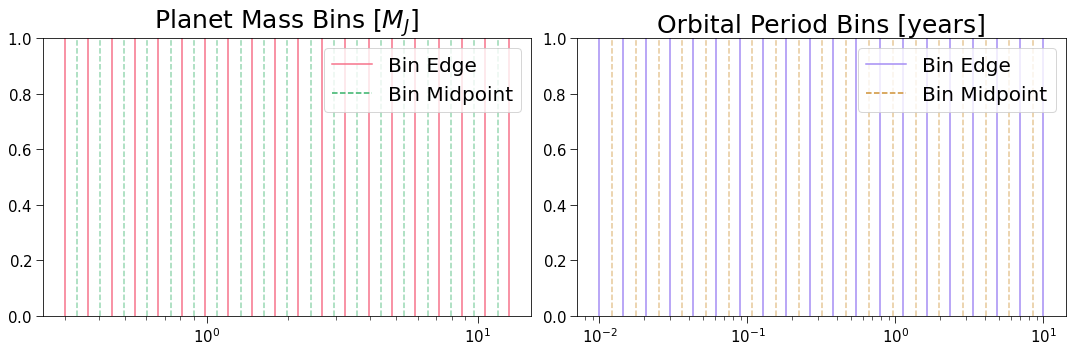

In [10]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Plot mass bin edges 
for bin_edge in Mbins:
    axs[0].axvline(x=bin_edge, color=my_colours[0], linestyle='-', alpha=1)

# Plot mass bin midpoints
for midpoint in Mbin_midpoints:
    axs[0].axvline(x=midpoint, color=my_colours[3], linestyle='--', alpha=0.5)

# Plot period bin edges
for bin_edge in Pbins:
    axs[1].axvline(x=bin_edge, color=my_colours[-2], linestyle='-', alpha=1)
    
# Plot period bin midpoints
for midpoint in Pbin_midpoints:
    axs[1].axvline(x=midpoint, color=my_colours[1], linestyle='--', alpha=0.5)

# Plot titles
axs[0].set_title('Planet Mass Bins [$M_J$]', fontsize=big_font)
axs[1].set_title('Orbital Period Bins [years]', fontsize=big_font)

for i in range(2):
    # Set axis ticks 
    axs[i].tick_params(labelsize=small_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)
    
    # Make axis numbers not scientific notation
    axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    # Make x-axis log 
    axs[i].set_xscale('log')

# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=my_colours[0], linestyle='-', label='Bin Edge'),
           plt.Line2D([], [], color=my_colours[3], linestyle='--', label='Bin Midpoint')]
axs[0].legend(handles=handles, fontsize=medium_font)

handles = [plt.Line2D([], [], color=my_colours[-2], linestyle='-', label='Bin Edge'),
           plt.Line2D([], [], color=my_colours[1], linestyle='--', label='Bin Midpoint')]
axs[1].legend(handles=handles, fontsize=medium_font)


# Adjust layout
plt.tight_layout()

In [11]:
# Data in non-log units
inj_mass_data   = 10**df['Inj.1P log(m_p)'] # [M_J]
inj_period_data = 10**df['Inj.1P log(P)'] # [years]

rec_mass_data   = 10**df['Rec.1P log(m_p)'] # [M_J]
rec_period_data = 10**df['Rec.1P log(P)'] # [years]

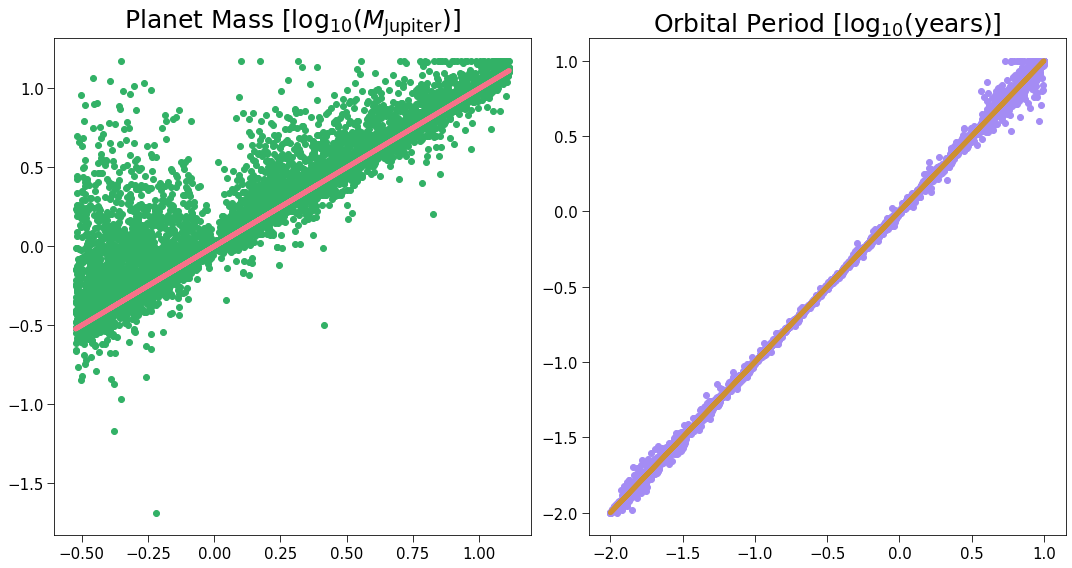

In [12]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(15,8))

# Plot scatter for mass
axs[0].scatter(df['Inj.1P log(m_p)'], 
               df['Rec.1P log(m_p)'],
               color = my_colours[3])

# Plot line for mass
axs[0].plot(df['Inj.1P log(m_p)'], 
            df['Inj.1P log(m_p)'],
            color = my_colours[0],
            lw = 5)


axs[1].scatter(df['Inj.1P log(P)'], 
               df['Rec.1P log(P)'], 
               color = my_colours[-2])

axs[1].plot(df['Inj.1P log(P)'], 
            df['Inj.1P log(P)'],
            color = my_colours[1],
            lw = 5)

# Plot titles
axs[0].set_title('Planet Mass [$\log_{10}(M_{\mathrm{Jupiter}}$)]', fontsize=big_font)
axs[1].set_title('Orbital Period [$\log_{10}$(years)]', fontsize=big_font)

for i in range(2):
    axs[i].tick_params(labelsize=small_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)


# Adjust layout
plt.tight_layout()

In [13]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 2, figsize=(12,7))

# # Plot histogram for m_planet
# axs[0].hist(injected_mass_data, # [M_J]
#             bins=Mbins, 
#             color=my_colours[0], 
#             edgecolor='black')

# # Plot histogram for P
# axs[1].hist(injected_period_data, # [years]
#             bins=Pbins, 
#             color=my_colours[-2], 
#             edgecolor='black')


# # Plot titles
# axs[0].set_title('Histogram of Planet Mass', fontsize=big_font)
# axs[1].set_title('Histogram of Orbital Period', fontsize=big_font)

# # Axes scale 
# axs[0].set_xscale('log')
# axs[1].set_xscale('log')

# # Axes labels 
# axs[0].set_xlabel('Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=medium_font)
# axs[1].set_xlabel('Orbital Period [years] ', fontsize=medium_font)

# for i in range(2):
#     axs[i].tick_params(labelsize=small_font, which='major', length=7)
#     axs[i].tick_params(which='minor', length=4)


# # Adjust layout
# plt.tight_layout()

# # Making axes labels not scientific notation
# axs[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# axs[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# # Show the plot
# plt.show()

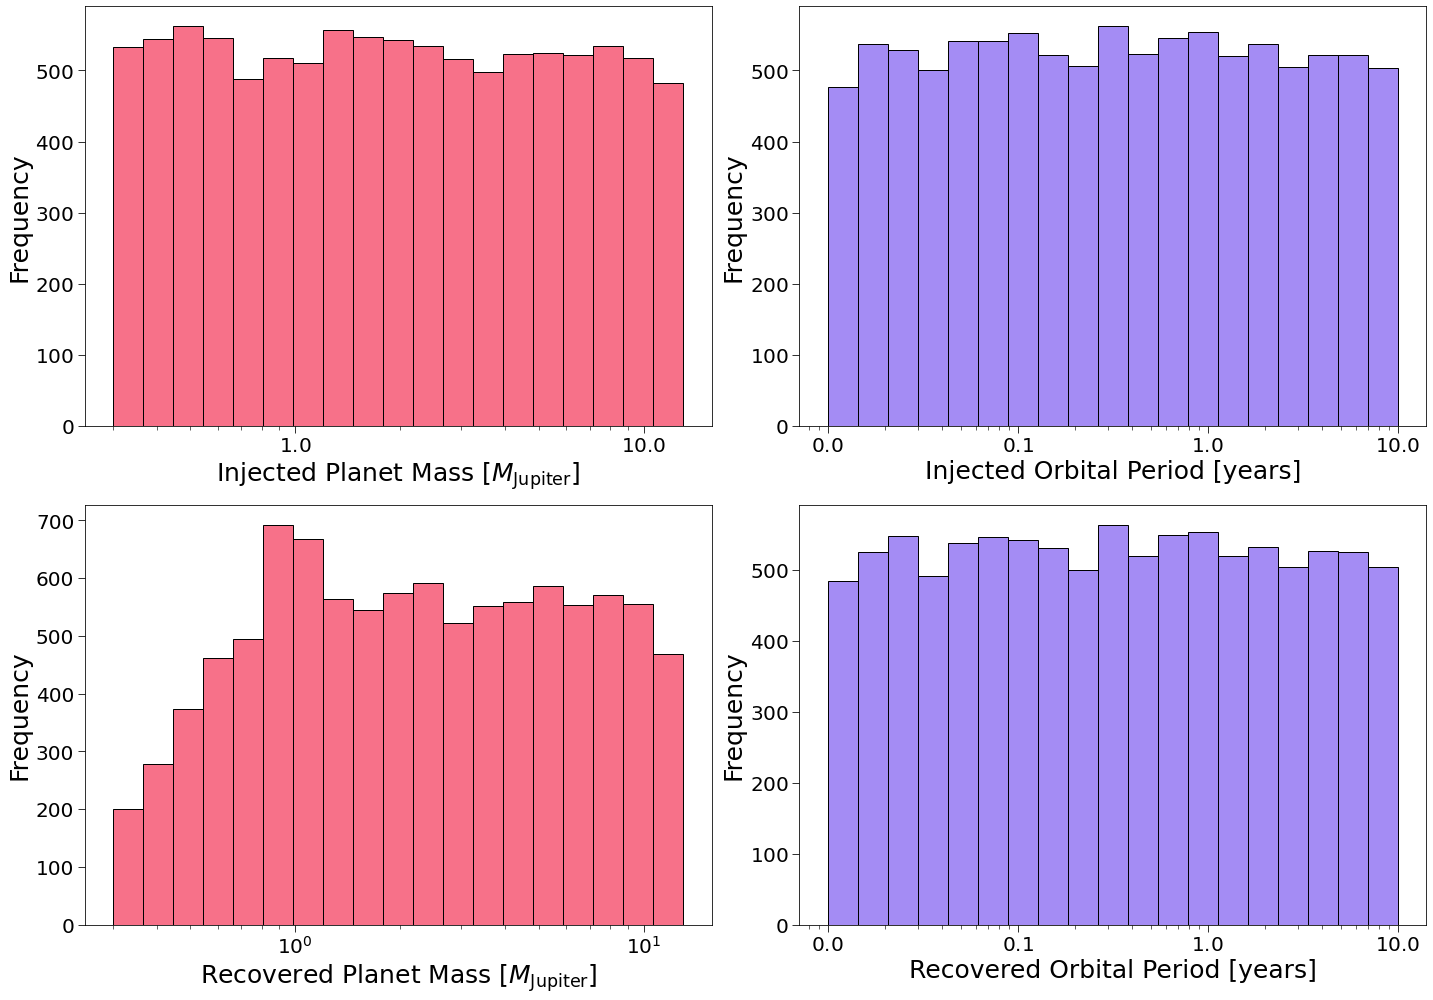

In [14]:
# Create a 4x4 figure of histograms
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot histogram for m_planet (top left)
axs[0, 0].hist(inj_mass_data, # [M_J]
            bins=Mbins, 
            color=my_colours[0], 
            edgecolor='black')

# Plot histogram for P (top right)
axs[0, 1].hist(inj_period_data, # [years]
            bins=Pbins, 
            color=my_colours[6], 
            edgecolor='black')

# Plot histogram for detection (bottom left)
axs[1, 0].hist(rec_mass_data, # [M_J]
            bins=Mbins, 
            color=my_colours[0], 
            edgecolor='black')

# Plot histogram SN (bottom right)
axs[1, 1].hist(rec_period_data, # [years]
            bins=Pbins, 
            color=my_colours[6], 
            edgecolor='black')

# Plot titles
# axs[0, 0].set_title('Histogram of Planet Mass', fontsize=paper_title_fs)
# axs[0, 1].set_title('Histogram of Orbital Period', fontsize=paper_title_fs)
# axs[1, 0].set_title('Histogram of Detection', fontsize=paper_title_fs)
# axs[1, 1].set_title('Histogram of $S/N$', fontsize=paper_title_fs)

# Axes scale 
axs[0, 0].set_xscale('log')
axs[0, 1].set_xscale('log')
axs[1, 0].set_xscale('log')
axs[1, 1].set_xscale('log')

# Axes labels 
axs[0, 0].set_xlabel('Injected Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=paper_axis_label_fs)
axs[0, 1].set_xlabel('Injected Orbital Period [years]', fontsize=paper_axis_label_fs)
axs[1, 0].set_xlabel('Recovered Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=paper_axis_label_fs)
axs[1, 1].set_xlabel('Recovered Orbital Period [years]', fontsize=paper_axis_label_fs)

for i in range(2):
    for j in range(2):
        axs[i, j].set_ylabel('Frequency', fontsize=paper_axis_label_fs)
        axs[i, j].tick_params(labelsize=paper_axis_num_size, which='major', length=7)
        axs[i, j].tick_params(which='minor', length=4)

# Adjust layout
plt.tight_layout()

# Making axes labels not scientific notation
axs[0, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

axs[0, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

axs[1, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Show the plot
plt.show()
axs[1, 1].set_xscale('log')

## Detection

In [15]:
detection_data = df['Detection']

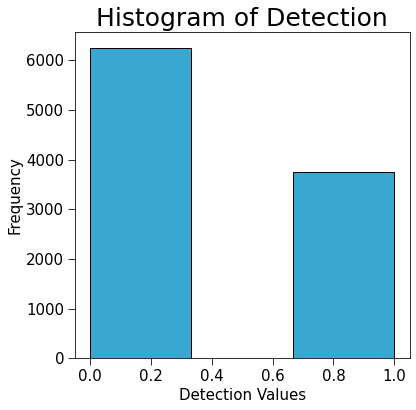

In [16]:
# Create a figure for the histogram
fig, ax = plt.subplots(figsize=(6, 6))  

# Plot histogram for detection data
ax.hist(detection_data, 
        bins=3, 
        color=my_colours[-3], 
        edgecolor='black')  # Adjust the number of bins as needed

# Titles and axes
ax.set_title('Histogram of Detection', fontsize=big_font)
ax.set_xlabel('Detection Values', fontsize=small_font)
ax.set_ylabel('Frequency', fontsize=small_font)

# Adjust ticks
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)
    
# Show the plot
plt.show()

## Making detection data 

In [17]:
# Making arrays we will fill in the for loop 
num_planets_per_bin   = np.zeros((num_Pbins, num_Mbins))
num_detected          = np.zeros((num_Pbins, num_Mbins))
sensitivity           = np.zeros((num_Pbins, num_Mbins))
detection_uncertainty = np.zeros((num_Pbins, num_Mbins))

### $\text{Detection uncertainty} = \frac{\sqrt{\text{# of detections in bin}}}{\text{# of planets in bin}}$

In [18]:
# Iterate through each period bin
for i, p in enumerate(Pbins[:-1]):
    # Iterate through each mass bin
    for j, m in enumerate(Mbins[:-1]):
        
        # Mask to determine if data falls within the current period-mass bin
        mask = (inj_mass_data >= Mbins[j]) & (inj_mass_data < Mbins[j+1]) & (inj_period_data >= Pbins[i]) & (inj_period_data < Pbins[i+1])
        
        # Determine the number of detected planets in the current bin
        detected = mask & (detection_data == 1)
        
        # Find the number of planets/data points in the current bin
        num_planets_per_bin[i, j] = mask.sum()
        
        # Find the number of detected planets in the current bin
        num_detected[i, j] = detected.sum()

sensitivity = num_detected / num_planets_per_bin
detection_uncertainty = np.sqrt(num_detected) / num_planets_per_bin

In [19]:
print('Minimum uncertainty: ', detection_uncertainty.min())
print('Maximum uncertainty: ', detection_uncertainty.max())

Minimum uncertainty:  0.0
Maximum uncertainty:  0.2672612419124244


In [20]:
# Empty cells occur where the sensitivity was set to -1
empty_cells = np.where(sensitivity == -1, -1, np.nan)

# Find and print the number of empty cells
num_empty_cells = np.sum(empty_cells == -1)
print('There are', num_empty_cells, 'empty cells')

There are 0 empty cells


# Plot: Period, mass, detection %
- x-axis: Period (years)
- y-axis: Mass ($M_J$)
- Axes should both be log 
- plot with plt.pcolormesh(period, mass, sensitivity.T)
- set to negative - set colour 

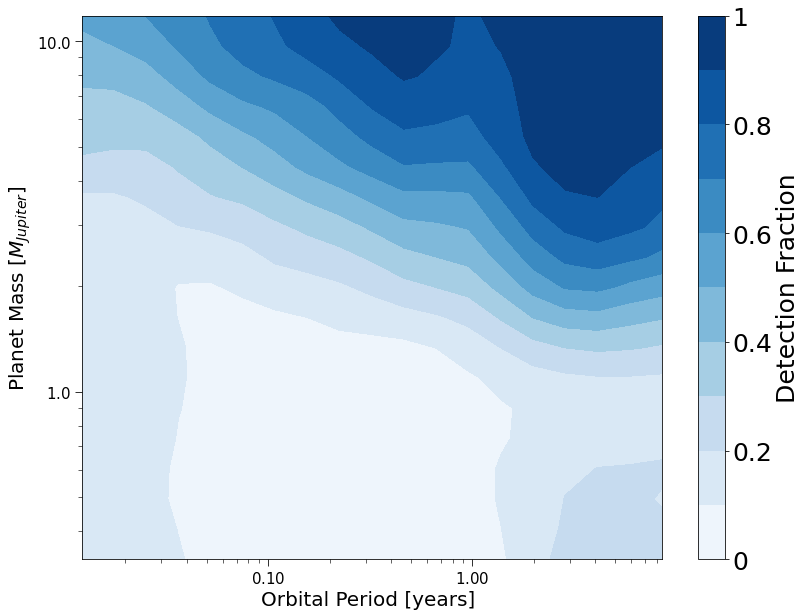

In [21]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(sensitivity.T, 1),
                 cmap='Blues',
                 vmin=0,
                 vmax=1,
                 levels=10)

# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    gaussian_filter(sensitivity.T, 1),
#                    cmap='Blues',
#                    vmin=0,
#                    vmax=1)


# Color bar
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Detection Fraction', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# If there are empty cells then add them to the plot 
if num_empty_cells > 0:
    # Plotting the masked array
    im_mask = ax.pcolormesh(Pbins,
                            Mbins,
                            empty_cells.T,
                            cmap=cmap_empty_cells,
                            alpha=empty_cells_alpha)

    # Empty cell legend
    empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)],
                                  labels=['Empty Cell'],
                                  loc='upper right',
                                  fontsize=small_font)
    
    # Add legend
    ax.add_artist(empty_cell_legend)

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

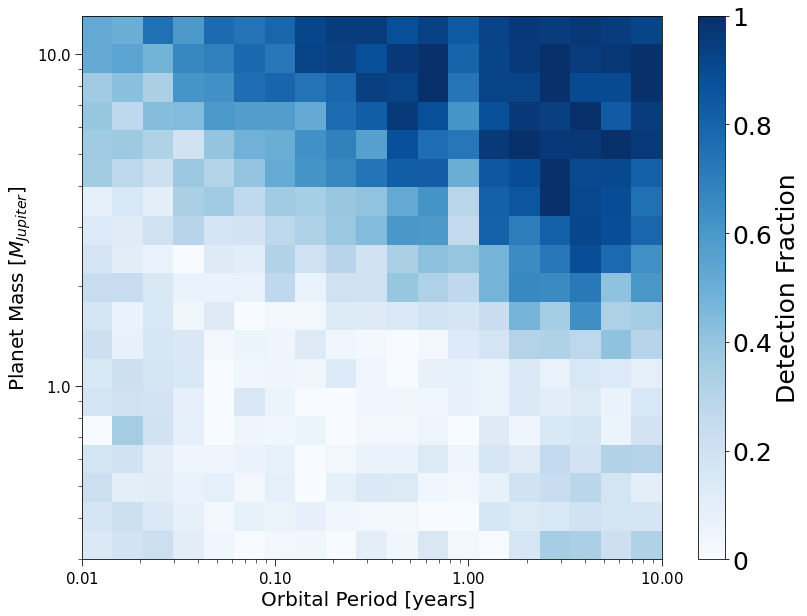

In [22]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))
         

im = ax.pcolormesh(Pbins,
                   Mbins,
                   sensitivity.T,
                   cmap='Blues',
                   vmin=0,
                   vmax=1)


# Color bar
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Detection Fraction', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# If there are empty cells then add them to the plot 
if num_empty_cells > 0:
    # Plotting the masked array
    im_mask = ax.pcolormesh(Pbins,
                            Mbins,
                            empty_cells.T,
                            cmap=cmap_empty_cells,
                            alpha=empty_cells_alpha)

    # Empty cell legend
    empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)],
                                  labels=['Empty Cell'],
                                  loc='upper right',
                                  fontsize=small_font)
    
    # Add legend
    ax.add_artist(empty_cell_legend)

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Occurence Plot

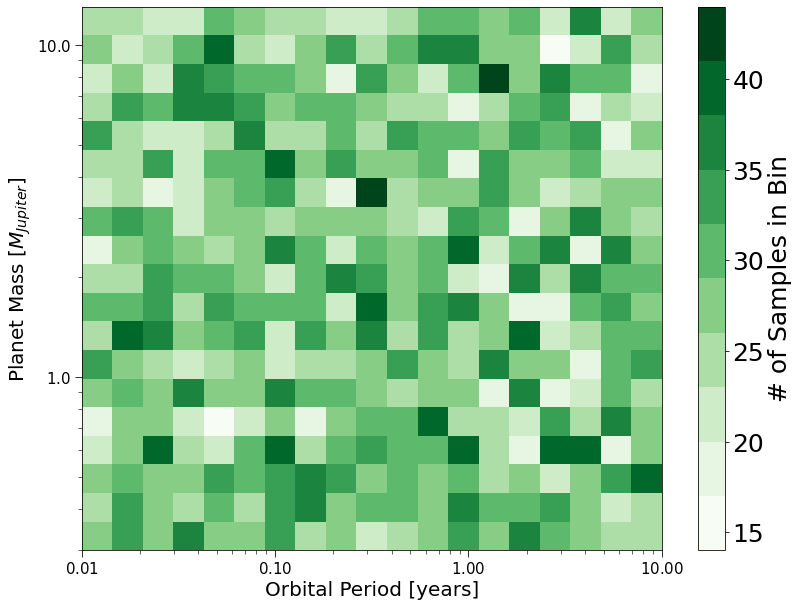

In [23]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

# Plotting main heatmap
im = ax.pcolormesh(Pbins,
                   Mbins,
                   num_planets_per_bin.T,
                   # cmap='Greens',
                   cmap = cmap_greens,
                   vmin=num_planets_per_bin.min(),
                   vmax=num_planets_per_bin.max())

# Color bar setup
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('# of Samples in Bin', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# If there are empty cells then add them to the plot 
if num_empty_cells > 0:
    # Plotting the masked array
    im_mask = ax.pcolormesh(Pbins,
                            Mbins,
                            empty_cells.T,
                            cmap=cmap_empty_cells,
                            alpha=empty_cells_alpha)

    # Empty cell legend
    empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)],
                                  labels=['Empty Cell'],
                                  loc='upper right',
                                  fontsize=small_font)
    
    # Add legend
    ax.add_artist(empty_cell_legend)

# Detection Plot

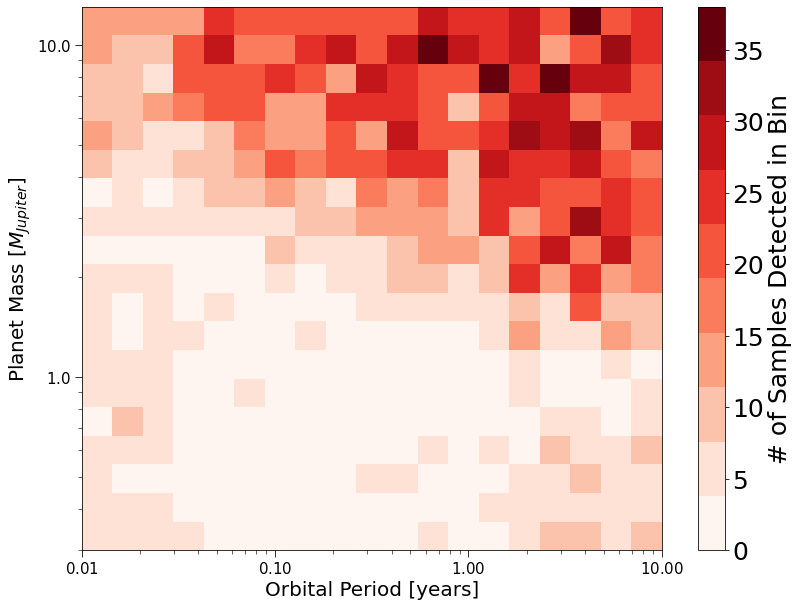

In [24]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

# Plotting main heatmap
im = ax.pcolormesh(Pbins,
                   Mbins,
                   num_detected.T,
                   # cmap = 'Reds', 
                   cmap=cmap_reds,
                   vmin=num_detected.min(),
                   vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('# of Samples Detected in Bin', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# If there are empty cells then add them to the plot 
if num_empty_cells > 0:
    # Plotting the masked array
    im_mask = ax.pcolormesh(Pbins,
                            Mbins,
                            empty_cells.T,
                            cmap=cmap_empty_cells,
                            alpha=empty_cells_alpha)

    # Empty cell legend
    empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)],
                                  labels=['Empty Cell'],
                                  loc='upper right',
                                  fontsize=small_font)
    
    # Add legend
    ax.add_artist(empty_cell_legend)

# Uncertainty Map

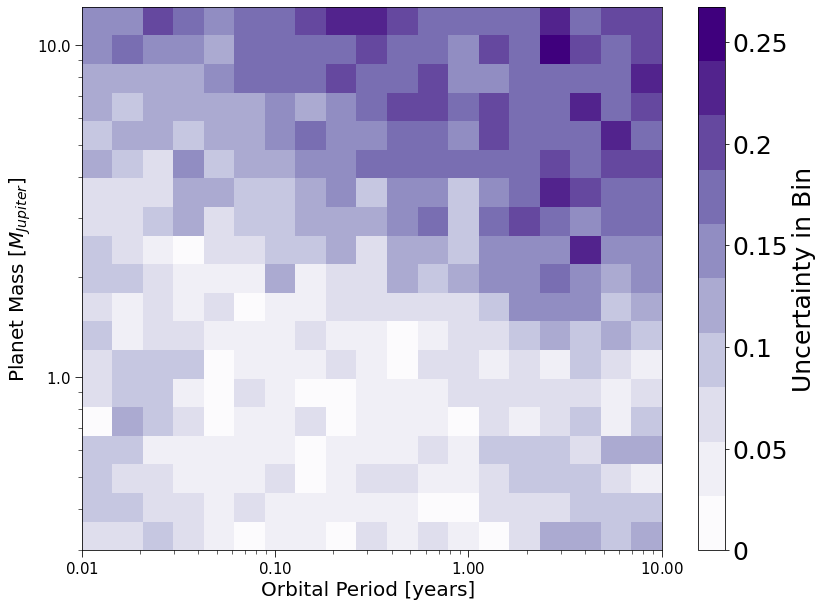

In [25]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

             
im = ax.pcolormesh(Pbins,
                   Mbins,
                   detection_uncertainty.T,
                   # cmap='Purples',
                   cmap = cmap_purples,
                   vmin=detection_uncertainty.min(),
                   vmax=detection_uncertainty.max())


# Color bar
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Uncertainty in Bin', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# If there are empty cells then add them to the plot 
if num_empty_cells > 0:
    # Plotting the masked array
    im_mask = ax.pcolormesh(Pbins,
                            Mbins,
                            empty_cells.T,
                            cmap=cmap_empty_cells,
                            alpha=empty_cells_alpha)

    # Empty cell legend
    empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)],
                                  labels=['Empty Cell'],
                                  loc='upper right',
                                  fontsize=small_font)
    
    # Add legend
    ax.add_artist(empty_cell_legend)

# S/N plot

In [31]:
SN_data = df['S/N']
Noise_data = df['Noise']

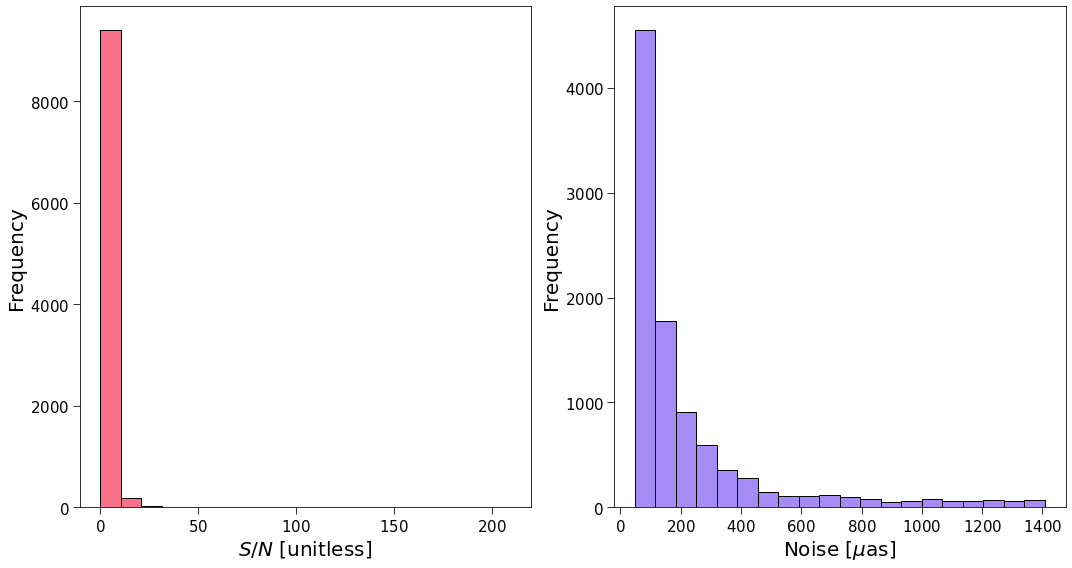

In [26]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(15,8))

# Plot histogram S/N 
axs[0].hist(df['S/N'], 
            bins=20, 
            color=my_colours[0], 
            edgecolor='black')

# Plot histogram for noise
axs[1].hist(df['Noise'],
            bins=20, 
            color=my_colours[-2], 
            edgecolor='black')

# Axes scale 
# axs[0].set_xscale('log')
# axs[1].set_xscale('log')

# Axes labels 
axs[0].set_xlabel('$S/N$ [unitless]', fontsize=medium_font)
axs[1].set_xlabel('Noise [$\mu$as] ', fontsize=medium_font)


for i in range(2):
    axs[i].tick_params(labelsize=small_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)
                  
    axs[i].set_ylabel('Frequency', fontsize=medium_font)
                  
    # Making axes labels not scientific notation
    axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- $S/N$ has units of unitless
- Based on the histogram, it has a Gaussian shape in logspace

In [27]:
SN_bins = np.linspace(0, 20, 21) 

# Calculate midpoints of SN bins
SN_midpoints = (SN_bins[:-1] + SN_bins[1:]) / 2

# Number of bins
num_SN_bins = len(SN_bins)-1

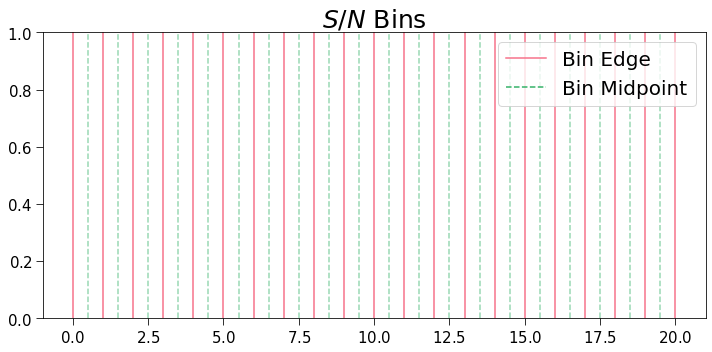

In [28]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 1, figsize=(10,5))

# Plot mass bin edges 
for bin_edge in SN_bins:
    axs.axvline(x=bin_edge, color=my_colours[0], linestyle='-', alpha=1)

# Plot mass bin midpoints
for midpoint in SN_midpoints:
    axs.axvline(x=midpoint, color=my_colours[3], linestyle='--', alpha=0.5)

# Plot titles
axs.set_title('$S/N$ Bins', fontsize=big_font)

axs.tick_params(labelsize=small_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# Make axis numbers not scientific notation
axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Make x-axis log 
#axs.set_xscale('log')

# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=my_colours[0], linestyle='-', label='Bin Edge'),
           plt.Line2D([], [], color=my_colours[3], linestyle='--', label='Bin Midpoint')]
axs.legend(handles=handles, fontsize=medium_font)


# Adjust layout
plt.tight_layout()

In [29]:
# Making arrays we will fill in the for loop 
SN_num_planets_per_bin   = np.zeros(num_SN_bins)
SN_num_detected          = np.zeros(num_SN_bins)
SN_sensitivity           = np.zeros(num_SN_bins)
SN_detection_uncertainty = np.zeros(num_SN_bins)

In [32]:
for i,s in enumerate(SN_bins[:-1]):
    mask = (SN_data >= SN_bins[i]) & (SN_data < SN_bins[i+1])

    # Determine the number of detected planets in the current bin
    detected = mask & (detection_data == 1)
    
    # Find the number of planets/data points in the current bin
    SN_num_planets_per_bin[i] = mask.sum()
    
    # Find the number of detected planets in the current bin
    SN_num_detected[i] = detected.sum()
    
SN_sensitivity = SN_num_detected/ SN_num_planets_per_bin
SN_detection_uncertainty = np.sqrt(SN_num_detected) / SN_num_planets_per_bin

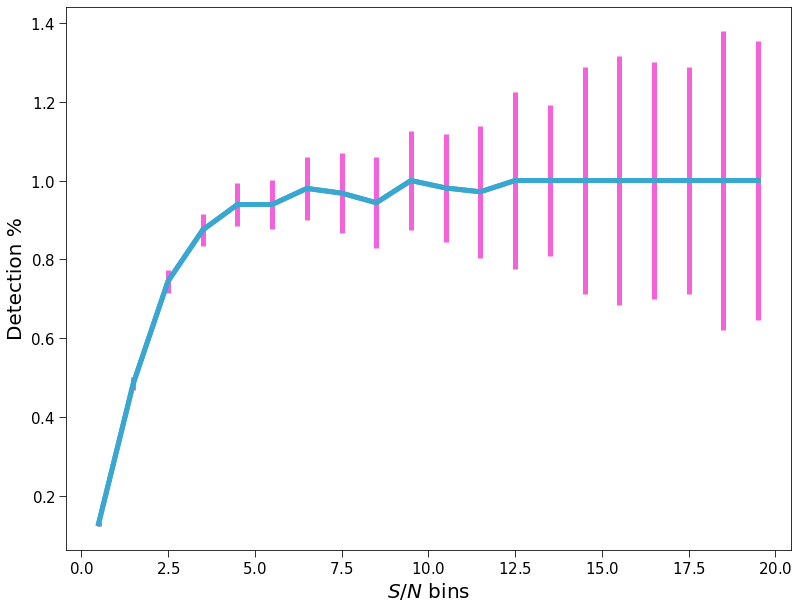

In [38]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

line = ax.errorbar(SN_midpoints,
                   SN_sensitivity,
                   color = my_colours[5],
                   lw = 5)


line = ax.errorbar(SN_midpoints,
                   SN_sensitivity,
                   yerr = SN_detection_uncertainty,
                   color = my_colours[5],
                   ecolor = my_colours[7],
                   lw = 5,
                   label = 'errorbars')


# Axes labels 
ax.set_xlabel('$S/N$ bins', fontsize=medium_font)
ax.set_ylabel('Detection %', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
# 

# ax.set_xscale('log')
# ax.set_yscale('log')

# Add legend
# ax.legend()

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

In [ ]:
# # Plotting the heatmap
# fig, ax = plt.subplots(figsize=(13, 10))
             
# line = ax.plot(SN_bin_midpoints,
#                SN_uncertainty,
#                color = my_colours[0],
#                lw = 5)

# # Axes labels 
# ax.set_xlabel('$S/N$ bins [unitless]', fontsize=medium_font)
# ax.set_ylabel('$S/N$ Uncertainty [$\mu as$]', fontsize=medium_font)

# # Adding ticks to axes
# ax.tick_params(labelsize=small_font, which='major', length=7)
# ax.tick_params(which='minor', length=4)


# # Set log scale for both axes
# ax.set_xscale('log')
# # ax.set_yscale('log')

# # Making axes labels not scientific notation
# ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Other Plots

In [ ]:
# Create a 4x4 figure of histograms
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot histogram for m_planet (top left)
axs[0, 0].hist(mass_data, # [M_J]
            bins=Mbins, 
            color=my_colours[0], 
            edgecolor='black')

# Plot histogram for P (top right)
axs[0, 1].hist(period_data, # [years]
            bins=Pbins, 
            color=my_colours[6], 
            edgecolor='black')

# Plot histogram for detection (bottom left)
# axs[1, 0].hist(df['m_star'], 
#             bins=3, 
#             color=my_colours[5], 
#             edgecolor='black')

# Plot histogram SN (bottom right)
axs[1, 1].hist(SN_data, # [years]
            bins=SN_bins, 
            color=my_colours[4], 
            edgecolor='black')

# Plot titles
# axs[0, 0].set_title('Histogram of Planet Mass', fontsize=paper_title_fs)
# axs[0, 1].set_title('Histogram of Orbital Period', fontsize=paper_title_fs)
# axs[1, 0].set_title('Histogram of Detection', fontsize=paper_title_fs)
# axs[1, 1].set_title('Histogram of $S/N$', fontsize=paper_title_fs)

# Axes scale 
axs[0, 0].set_xscale('log')
axs[0, 1].set_xscale('log')
axs[1, 1].set_xscale('log')

# Axes labels 
axs[0, 0].set_xlabel('Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=paper_axis_label_fs)
axs[0, 1].set_xlabel('Orbital Period [years]', fontsize=paper_axis_label_fs)
axs[1, 0].set_xlabel('Detection', fontsize=paper_axis_label_fs)
axs[1, 1].set_xlabel('$S/N$ [unitless]', fontsize=paper_axis_label_fs)

for i in range(2):
    for j in range(2):
        axs[i, j].set_ylabel('Frequency', fontsize=paper_axis_label_fs)
        axs[i, j].tick_params(labelsize=paper_axis_num_size, which='major', length=7)
        axs[i, j].tick_params(which='minor', length=4)

# Adjust layout
plt.tight_layout()

# Making axes labels not scientific notation
axs[0, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

axs[0, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

axs[1, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Show the plot
plt.show()


# Detection

In [35]:
# Sample data
conditions = ['Condition 1', 'Condition 2', 'Condition 3', 'Detection']

pass_c1 = np.sum(df['Condition1'])
pass_c2 = np.sum(df['Condition2'])
pass_c3 = np.sum(df['Condition3'])
pass_det = np.sum(df['Detection'])

fail_c1 = len(df['Condition1'])  - pass_c1
fail_c2 = len(df['Condition2']) - pass_c2
fail_c3 = len(df['Condition3']) - pass_c3
fail_det = len(df['Detection']) - pass_det

pass_counts = [pass_c1, pass_c2, pass_c3, pass_det]  # Number of signals passing each condition
fail_counts = [fail_c1, fail_c2, fail_c3, fail_det]  # Number of signals failing each condition

# Calculate total counts (pass + fail) for each condition
total_counts = np.array(pass_counts) + np.array(fail_counts)

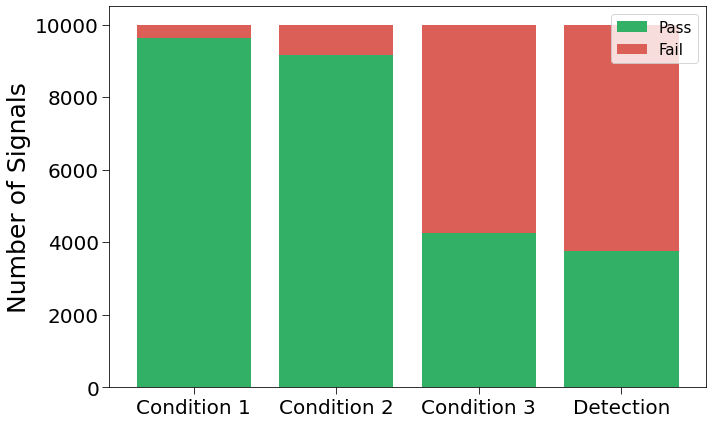

In [36]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6)) 

# Stacked bar plot
ax.bar(conditions, 
        pass_counts, 
        color=my_colours[3], 
        label='Pass')

ax.bar(conditions, 
        fail_counts, 
        bottom=pass_counts, 
        color=detection_colours[0], 
        label='Fail')


#ax.set_xlabel('Conditions',fontsize = paper_axis_label_fs)
ax.set_ylabel('Number of Signals', fontsize = paper_axis_label_fs)

# plt.title('Pass/Fail Ratio for Each Condition', fontsize=paper_title_fs)

ax.tick_params(labelsize=paper_axis_num_size, which='major', length=7)
ax.tick_params(which='minor', length=4)
        
        

plt.legend(fontsize = 15)

plt.tight_layout()
plt.show()